In [1]:
%load_ext autoreload
%autoreload 2


import sys
import healpy as hp
sys.path.append('/global/homes/l/lbigwood/S4Mock/')
#import mxxl_real
import glob
from astropy.table import vstack,Table,join
from fa_tools import fa_plot
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
from   desitarget.sv3.sv3_targetmask import desi_mask, bgs_mask, mws_mask, scnd_mask
import pylab as pl
import S4Mock_io
import mock_ledger
from desimodel.footprint import is_point_in_desi, tiles2pix
from desitarget.geomask import pixarea2nside

In [85]:
ledger = vstack([Table.read(x) for x in glob.glob('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/sv3/bright/initial/sv3mtl-bright-hp-*.ecsv')])

Requested fieldrot=2.0 arcsec delta=-0.0 arcsec
Requested fieldrot=2.0 arcsec delta=0.0 arcsec


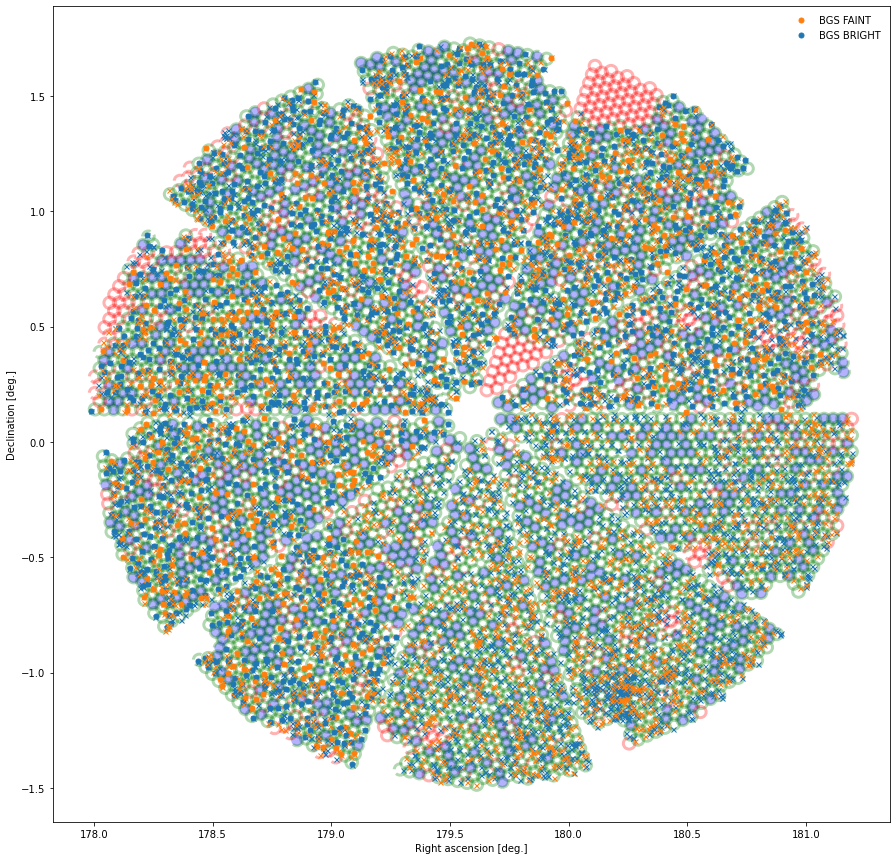

<Figure size 432x288 with 0 Axes>

In [86]:
fa_plot('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/20210406/fba-000039.fits',ledger)

In [ ]:
p = fits.open('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/20210406/fba-000039.fits')
fassign = p['FASSIGN'].data
favail = p['FAVAIL'].data
ftargs = p['FTARGETS'].data

In [96]:
Table(fassign)

FIBER,TARGETID,LOCATION,FIBERSTATUS,LAMBDA_REF,PETAL_LOC,DEVICE_LOC,DEVICE_TYPE,TARGET_RA,TARGET_DEC,FA_TARGET,FA_TYPE,FIBERASSIGN_X,FIBERASSIGN_Y
int32,int64,int32,int32,float32,int16,int32,str3,float64,float64,int64,uint8,float32,float32
400,288230404425521362,0,0,5400.0,0,0,POS,179.60252380371094,0.006860057823359966,1152921504606846976,1,-0.8560206,-27.493164
449,288230404425517136,1,0,5400.0,0,1,POS,179.6094512939453,-0.029959626495838165,1152921504606846976,1,-2.5397356,-36.446312
420,616088540043805219,2,0,5400.0,0,2,POS,179.5858819505225,-0.011244163901681129,4294967296,4,3.1882598,-31.894894
401,288230404425516184,3,0,5400.0,0,3,POS,179.64309692382812,-0.05536516755819321,1152921504606846976,1,-10.718732,-42.628094
403,616088540043805042,4,0,5400.0,0,4,POS,179.60313027883987,-0.049015817805127156,4294967296,4,-1.0035245,-41.081795
427,616088540043804722,5,0,5400.0,0,5,POS,179.6435947215694,-0.11604400188271558,4294967296,4,-10.844077,-57.401737
412,616088534004008051,6,0,5400.0,0,6,POS,179.60902526720778,-0.1340287642760993,4294967296,4,-2.437639,-61.782272
447,288230404425517872,7,0,5400.0,0,7,POS,179.56057739257812,-0.12317690253257751,1152921504606846976,1,9.344717,-59.138977
437,288230404425516553,8,0,5400.0,0,8,POS,179.65489196777344,-0.17546135187149048,1152921504606846976,1,-13.598562,-71.889854


In [88]:
#target files produced by fiberassign
targs = vstack([Table.read(x) for x in glob.glob('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/20210406/*-targ.fits')])

In [89]:
#target files produced by fiberassign
fbas = vstack([Table.read(x) for x in glob.glob('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/20210406/fba-*.fits')])

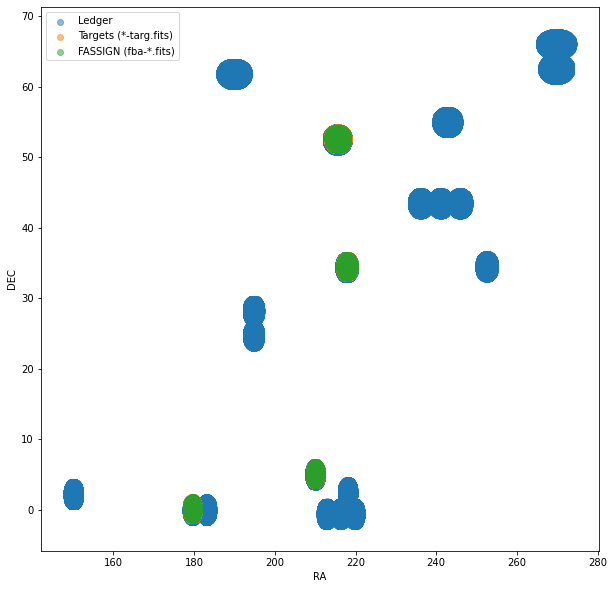

In [91]:
plt.figure(figsize=(10,10))


#plt.scatter(ftargs['TARGET_RA'],ftargs['TARGET_DEC'],label='FTARGETS (fba-000012.fits)', alpha=0.5)
plt.scatter(ledger['RA'],ledger['DEC'],label='Ledger', alpha=0.5)
plt.scatter(targs['RA'],targs['DEC'],label='Targets (*-targ.fits)', alpha=0.5)
plt.scatter(fbas['TARGET_RA'],fbas['TARGET_DEC'],label='FASSIGN (fba-*.fits)', alpha=0.5)
#plt.scatter(favail['RA'],favail['DEC'])

plt.xlabel('RA')
plt.ylabel('DEC')
#plt.xlim(170,190)
#plt.ylim(-5,5)
plt.legend()

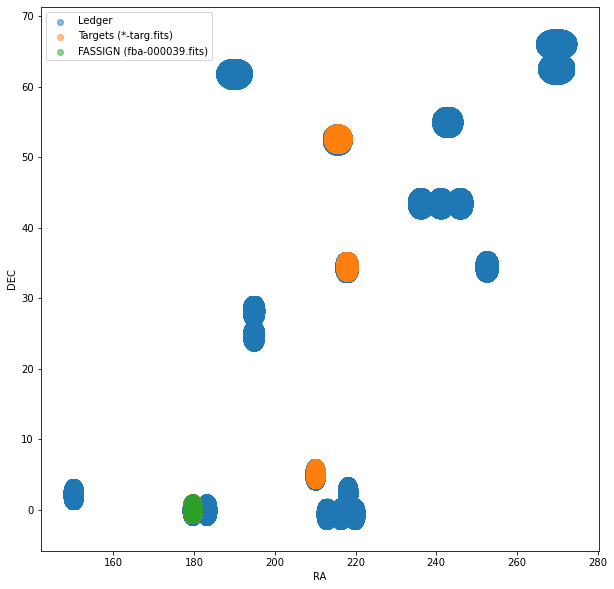

In [92]:
#same but for one fba file

plt.figure(figsize=(10,10))


#plt.scatter(ftargs['TARGET_RA'],ftargs['TARGET_DEC'],label='FTARGETS (fba-000012.fits)', alpha=0.5)
plt.scatter(ledger['RA'],ledger['DEC'],label='Ledger', alpha=0.5)
plt.scatter(targs['RA'],targs['DEC'],label='Targets (*-targ.fits)', alpha=0.5)
plt.scatter(fassign['TARGET_RA'],fassign['TARGET_DEC'],label='FASSIGN (fba-000039.fits)', alpha=0.5)

plt.xlabel('RA')
plt.ylabel('DEC')
#plt.xlim(170,190)
#plt.ylim(-5,5)
plt.legend()

In [77]:
"""
fba       = join(fassign,  ledger, keys='TARGETID', join_type='left')
favl      = join(favail, ledger, keys='TARGETID', join_type='left')

#checking same hp for tiles and ledger
from S4Mock_io import read_sv3tiles
tiles = read_sv3tiles()
hps       = geometry.radec2pix(tiles, unique=True, nside=32)
print(hps.data)

from geometry import radec2pix
pix = radec2pix(ledger)
np.unique(pix).data
"""

In [116]:
#checking whether fassign etc is in ledger
np.mean(np.in1d(fassign['TARGETID'],ledger['TARGETID']))
np.mean(np.in1d(favail['TARGETID'],ledger['TARGETID']))

0.06117975028139151

In [86]:
#shows how to load a zbest file 
x = np.loadtxt('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/20210408/zbest-20210408.txt')
Table(x)

col0,col1,col2,col3,col4,col5,col6
float64,float64,float64,float64,float64,float64,float64
149.59182739257812,2.70736026763916,1.0,10.0,-1.0,0.0,14.0
150.5951690673828,2.487602472305298,2.8823040473169926e+17,1.0,-1.0,0.0,14.0
151.23558044433594,2.8961873054504395,2.882304047316993e+17,1.0,-1.0,0.0,14.0
151.24766540527344,2.8385677337646484,2.882304047316993e+17,1.0,-1.0,0.0,14.0
150.19400024414062,1.7814902067184448,2.882304047316993e+17,1.0,-1.0,0.0,14.0
151.12876892089844,2.5124478340148926,2.882304047316993e+17,1.0,-1.0,0.0,14.0
149.32086181640625,2.2322099208831787,2.882304047316993e+17,1.0,-1.0,0.0,14.0
150.12542724609375,3.0265586376190186,2.882304047316993e+17,1.0,-1.0,0.0,14.0
149.8722686767578,2.491215467453003,2.882304047316993e+17,1.0,-1.0,0.0,14.0


In [103]:
from desimodel.footprint import is_point_in_desi, tiles2pix
from desitarget.geomask import pixarea2nside

#read targets in 
#get tiles
tiles = S4Mock_io.read_sv3tiles()
# closest nside to DESI tile area of ~7 deg
nside = pixarea2nside(7.)
# ADM determine the pixels that touch the tiles.
pixlist = tiles2pix(nside, tiles=tiles)
#read in mxxl
mxxl =S4Mock_io.read_mxxl(small=False,nside=nside)
#read in our mxxl targets but having this nside and this pixlist 
targets = mxxl[np.in1d(mxxl['HPX'],pixlist)]
#restrict only to targets in the requested tiles...
ii = is_point_in_desi(tiles, targets["RA"], targets["DEC"])
targets = targets[ii]
#now get pixlist in nside=32
pix32 = geometry.radec2pix(targets,nside=32)
targets['HPX']=pix32

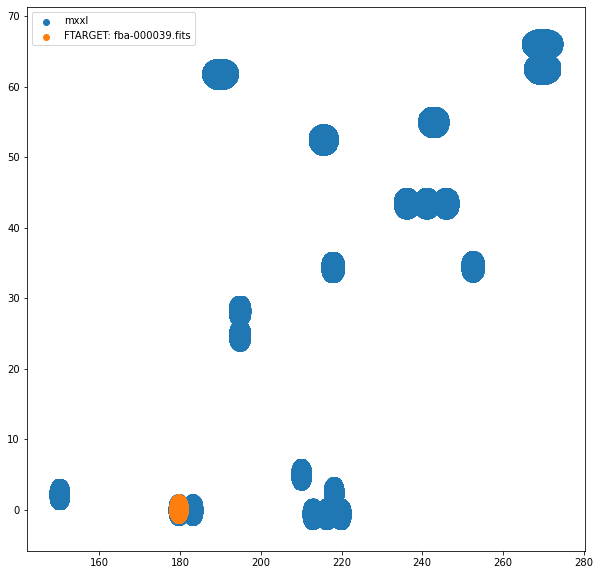

In [106]:
#compare whole mxxl and a particular fba file 
plt.figure(figsize=(10,10))
plt.scatter(targets['RA'],targets['DEC'],label='mxxl')
plt.scatter(ftargs['TARGET_RA'],ftargs['TARGET_DEC'],label= 'FTARGET: fba-000039.fits')
plt.legend()

In [83]:
#sv3 pix now more accurate as not just using central ra and dec 
pix4ledger = geometry.radec2pix(targets,nside=32,unique=True).data
pix4ledger

array([2286, 2287, 2333, 2334, 2335, 2356, 2357, 2376, 2378, 2400, 2447,
       2453, 2454, 2455, 2457, 2458, 2459, 2460, 2461, 2462, 2469, 2471,
       2480, 2481, 2482, 2483, 2484, 2495, 2496, 2498, 2504, 2536, 2537,
       2538, 2539, 2549, 2551, 2557, 2559, 2592, 2594, 2595, 2600, 2601,
       2602, 2628, 2629, 2630, 2631, 2679, 2685, 2803, 2806, 2807, 2809,
       2812, 2813, 2837, 2850, 2851, 2856, 2857, 2880, 2881, 2901, 2903,
       2978, 2984, 3834, 3835, 3838, 3839, 4010, 4011, 6398, 6399, 6477,
       6478, 6479, 6481, 6482, 6483, 6484, 6486, 6488, 6489, 6490, 6491,
       6492, 6493, 6494, 6495, 6500, 6501, 6503, 6509, 6511, 6512, 6513,
       6516, 6517, 6520, 6521, 6522, 6523, 6562, 6563, 6568, 6569, 6570,
       6571, 6572, 6574, 6608, 6609, 6740, 6741, 6743, 6809, 6811, 6812,
       6814, 6815, 6833, 6836, 6837, 6912, 6914, 7006, 7007, 7028, 7029,
       7030, 7031, 7037])

In [84]:
#creating ledger so lets not do this again
"""
for i in range(len(pix4ledger)):
    mock_ledger.create_mock_ledger_hp(outdir='/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2', healpix=pix4ledger[i], mxxl=targets, overwrite=False)
"""

Selected 0.327 as BGS Bright
Check: 0.039
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2/sv3mtl-bright-hp-2286.ecsv
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2/sv3zs-bright-hp-2286.ecsv
Selected 0.314 as BGS Bright
Check: 0.040
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2/sv3mtl-bright-hp-2287.ecsv
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2/sv3zs-bright-hp-2287.ecsv
Selected 0.293 as BGS Bright
Check: 0.031
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2/sv3mtl-bright-hp-2333.ecsv
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2/sv3zs-bright-hp-2333.ecsv
Selected 0.331 as BGS Bright
Check: 0.036
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2/sv3mtl-bright-hp-2334.ecsv
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2/sv3zs-bright-hp-2334.ecsv
Selected 0.341 as BGS Bright
Check: 0.037
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/v2/sv

In [137]:
import os.path

nights    = [x.split('/')[-1] for x in sorted(glob.glob(root + '/*'))]


tiles = S4Mock_io.read_sv3tiles()
rosettes = np.unique(tiles['ROSETTE']).data
for i in range(len(rosettes)):
    tiles_for_rosette = np.unique(tiles[(tiles['ROSETTE']==rosettes[i])]['TILEID']).data
    print('Rosette {} tiles:{}'.format(rosettes[i],tiles_for_rosette))
    for j in range(len(tiles_for_rosette)):
        test = []
        for k in range(len(nights)):
            if os.path.exists('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/' +nights[k] +'/fba-{:06}.fits'.format(tiles_for_rosette[j])) == True:
                test.append(1)
            else:
                continue
        if len(test)==1:
            continue
        else:
            print('Rosette {} incomplete: no tile {}'.format(rosettes[i],tiles_for_rosette[j]))

    

Rosette 0 tiles:[12 13 14 15 16 17 18 19 20 21]
Rosette 0 incomplete: no tile 16
Rosette 0 incomplete: no tile 17
Rosette 0 incomplete: no tile 18
Rosette 0 incomplete: no tile 19
Rosette 0 incomplete: no tile 20
Rosette 0 incomplete: no tile 21
Rosette 1 tiles:[39 40 41 42 43 44 45 46 47 48 49]
Rosette 1 incomplete: no tile 45
Rosette 1 incomplete: no tile 46
Rosette 1 incomplete: no tile 47
Rosette 1 incomplete: no tile 48
Rosette 1 incomplete: no tile 49
Rosette 2 tiles:[66 67 68 69 70 71 72 73 74 75 76]
Rosette 2 incomplete: no tile 69
Rosette 2 incomplete: no tile 70
Rosette 2 incomplete: no tile 71
Rosette 2 incomplete: no tile 72
Rosette 2 incomplete: no tile 73
Rosette 2 incomplete: no tile 74
Rosette 2 incomplete: no tile 75
Rosette 2 incomplete: no tile 76
Rosette 3 tiles:[ 93  94  95  96  97  98  99 100 101 102 103]
Rosette 3 incomplete: no tile 96
Rosette 3 incomplete: no tile 97
Rosette 3 incomplete: no tile 98
Rosette 3 incomplete: no tile 99
Rosette 3 incomplete: no tile

In [138]:
whole_ledger = vstack([Table.read(x) for x in glob.glob('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/sv3/bright/sv3mtl-bright-hp-*.ecsv')])

In [141]:
print(len(whole_ledger))
print(len(np.unique(whole_ledger['TARGETID'].data)))

670235
543556


In [142]:
init_ledger = vstack([Table.read(x) for x in glob.glob('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/sv3/bright/initial/sv3mtl-bright-hp-*.ecsv')])

In [143]:
print(len(init_ledger))
print(len(np.unique(init_ledger['TARGETID'].data)))

543556
543556


In [147]:
p = fits.open('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial//Univ000//fa/SV3/20210415/000339-targ.fits')
targs339= p[1].data
np.mean(np.in1d(targs339['TARGETID'],init_ledger['TARGETID']))

1.0